## TAKE HOME TEST - DATA PREPARATION

> ### Objective: 
> - To demonstrate practical skills in data preprocessing by cleansing and preparing the data.
> 
> ### Dataset: 
> - The Adult dataset, available at [UCI Machine Learning Repository - Adult Dataset](https://archive.ics.uci.edu/dataset/2/adult). 
> - The dataset aims to predict whether an individual's income exceeds $50K/yr based on census data.

### 1. DATA QUALITY ASSESSMENT
> Load the dataset into a suitable data structure. 
>
> Perform an initial inspection of the dataset, and identify:
> - Number of rows and columns.
> - Data types of each column.
> - Missing values of each column.
> - Any initial observations or issues you notice (if any).

In [39]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# load data
df = pd.read_csv('data/adult_csv.csv')

In [3]:
# show top data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [4]:
# show bottom data
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K
48841,1,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,United-States,>50K


In [5]:
# show datatypes of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

In [6]:
# show info in the table
df.shape

(48842, 15)

In [7]:
# show missing values of each column
df.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

In [8]:
# check duplicate value in the data
df[df.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
4152,0,NaN,174714,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,0,United-States,<=50K
4277,0,Private,180052,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,0,United-States,<=50K
4299,0,NaN,124242,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,2,United-States,<=50K
4881,0,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,2,Mexico,<=50K
5104,4,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,1,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48030,0,Private,200295,Some-college,10,Never-married,Other-service,Not-in-family,White,Male,0,0,1,United-States,<=50K
48131,0,Private,336101,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,1,United-States,<=50K
48465,0,Private,209650,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,0,United-States,<=50K
48521,0,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,0,United-States,<=50K


In [9]:
# checkk duplicate data in the table after dropping the duplicate
round(df.duplicated().sum()/len(df)*100, 2)

0.38

In [10]:
# drop duplicate value in the data
df.drop_duplicates(keep = False, inplace = True, ignore_index = True)

In [11]:
# checkk duplicate data in the table after dropping the duplicate
round(df.duplicated().sum()/len(df)*100, 2)

0.0

In [12]:
# show info in the table after dropping
df.shape

(48472, 15)

### 2. DATA TYPE TRANSFORMATION
> Identify columns that are not of the appropriate data type:
> - Suggest a more suitable data type for these columns.
> - Transform the identified columns to the suggested data types.

In [13]:
# show data types for each columns in the table
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

In [14]:
# show top of the data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


> After showing the data types in the table, i didn't found data types that incorrect in the columns, so I can't change any data type in the table

### 3. MISSING VALUES HANDLING
> For each missing values in each column:
> - Identify any columns that have missing values, you can also show the number and percentage of missing values.
> - Propose and justify your chosen method(s) for handling the missing values in each column.
> - Implement your chosen method(s) to handle the missing values.

In [15]:
# check the percentage of missing values in the table
round(df.isna().sum()/len(df)*100, 2)

age               0.00
workclass         5.69
fnlwgt            0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.71
relationship      0.00
race              0.00
sex               0.00
capitalgain       0.00
capitalloss       0.00
hoursperweek      0.00
native-country    1.76
class             0.00
dtype: float64

> #### **Imputing Missing Values**
> for handling missing values in the _workclass_ column, I will impute each missing value with _No-Data_, because i don't know how to fill it correctly with mean, median, or mode of the data.


In [16]:
# check description value in workclass column
df['workclass'] = df['workclass'].describe()

In [17]:
# fill missing value in the workclass with 'No-Data'
df['workclass'] = df['workclass'].fillna('No-Data')

In [18]:
# check unique value after imputing missing value in the 'workclass' column
df['workclass'].unique()

array(['No-Data'], dtype=object)

In [19]:
# fill missing value in the 'occupation' with 'No-Data'
df['occupation'] = df['occupation'].fillna('No-Data')

In [20]:
# check unique value after imputing missing value in the 'occupation' column 
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'No-Data', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [21]:
round(df.isna().sum()/len(df)*100, 2)

age               0.00
workclass         0.00
fnlwgt            0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        0.00
relationship      0.00
race              0.00
sex               0.00
capitalgain       0.00
capitalloss       0.00
hoursperweek      0.00
native-country    1.76
class             0.00
dtype: float64

In [22]:
df.isna().sum()

age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capitalgain         0
capitalloss         0
hoursperweek        0
native-country    851
class               0
dtype: int64

> #### **Pairwise Dropping**
> For the native-country column, we can drop all the missing values in the column. Because they only have 1.76% missing values of the data.

In [23]:
# drop entire column that have missing value
df.dropna(subset=['native-country'], inplace = True)

In [24]:
# check missing value after impute and dropping 
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capitalgain       0
capitalloss       0
hoursperweek      0
native-country    0
class             0
dtype: int64

In [42]:
df.reset_index(drop=True).head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,No-Data,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,No-Data,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,No-Data,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,No-Data,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,No-Data,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [26]:
# check amount of the data after missing value handling
df.shape

(47621, 15)

### 4. DETECTING AND HANDLING OUTLIERS
> Using suitable techniques, identify columns that have outliers: 
> - Report these columns and the number of outliers detected.
> - Propose a strategy to handle the outliers. Justify your choice of strategy.
> - Implement the chosen strategies to handle the outliers.

In [27]:
# show the description of the data 
df.describe()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek
count,47621.000000,4.762100e+04,47621.000000,47621.000000,47621.000000,47621.000000
mean,1.777598,1.896718e+05,10.066777,0.201340,0.115621,1.951471
std,1.296261,1.059259e+05,2.561784,0.747438,0.558418,0.897297
min,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.173130e+05,9.000000,0.000000,0.000000,2.000000
50%,2.000000,1.780660e+05,10.000000,0.000000,0.000000,2.000000
75%,3.000000,2.378480e+05,12.000000,0.000000,0.000000,2.000000
max,4.000000,1.490400e+06,16.000000,4.000000,4.000000,4.000000


In [28]:
# split numeric and object data 
df_num = df.select_dtypes(exclude = ['object'])

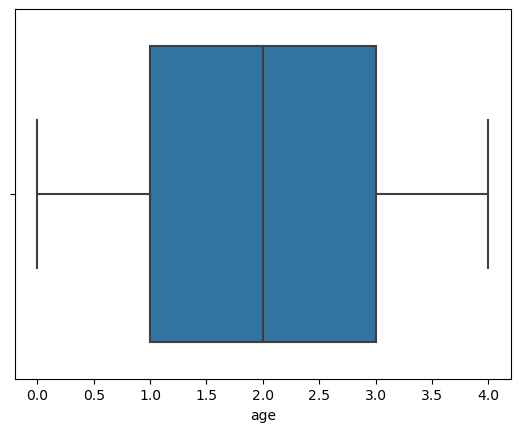

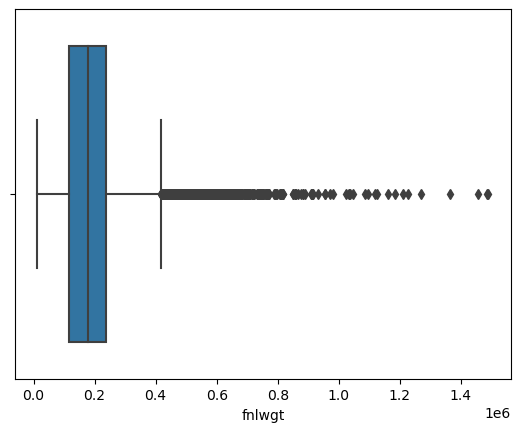

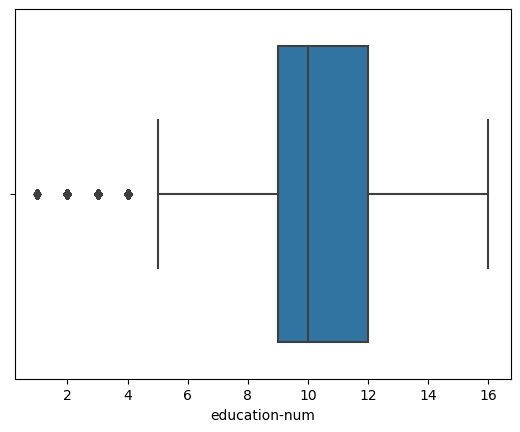

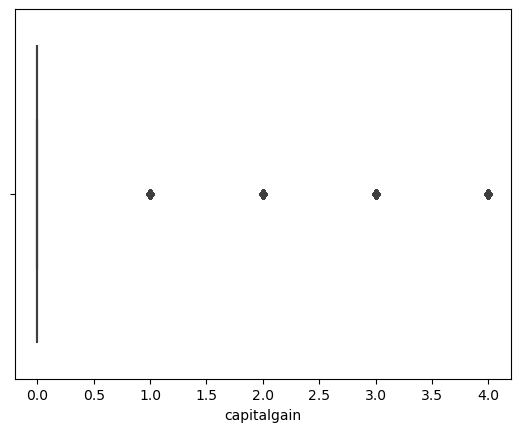

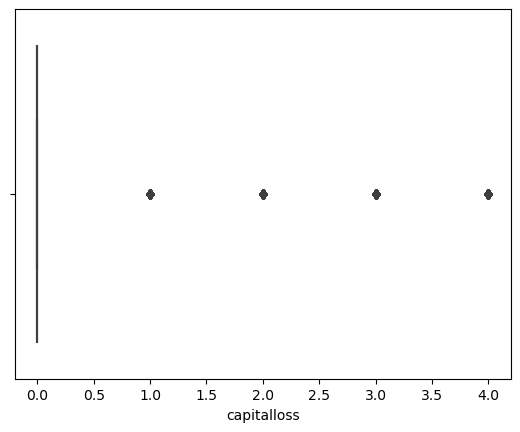

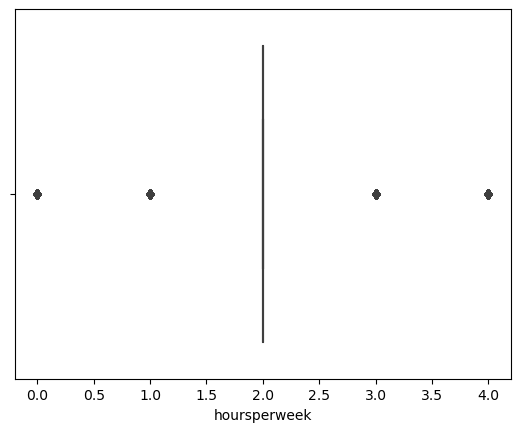

In [29]:
# show ouliers in the column using loop
for i in df_num:
    sns.boxplot(data = df_num, x = i)
    plt.show()

In [30]:
# defined variable for each column
age = df['age']
fnlwgt = df['fnlwgt']
education_num = df['education-num']
capitalgain = df['capitalgain']
capitalloss = df['capitalloss']
hoursperweek = df['hoursperweek']


In [31]:
def findoutlier(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    
    # Count limit value
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    
    low_out = []
    upp_out = []
    
    # find upper limit and lower limit for each column using for loop
    for i in data:
        if (i > upper_limit):
            upp_out.append(i)
        if (i < lower_limit):
            low_out.append(i)
            
    return print('lower limit: ', low_out, '||  upper limit: ', upp_out)

In [43]:
# find upper and lower limit from age column
findoutlier(df['age'])

lower limit:  [] ||  upper limit:  []


In [44]:
# find upper and lower limit from fnlwgt column
findoutlier(df['fnlwgt'])

lower limit:  [] ||  upper limit:  [544091, 507875, 446839, 432376, 494223, 428030, 483777, 633742, 523910, 635913, 538583, 477983, 425161, 860348, 423158, 481060, 445382, 1033222, 426017, 543162, 433665, 462440, 556660, 430828, 475028, 420537, 680390, 499233, 543028, 465507, 526968, 767403, 431192, 520586, 445824, 444304, 441454, 421132, 795830, 419721, 509350, 467108, 444554, 449257, 441620, 563883, 431745, 436006, 473040, 910398, 451940, 428350, 421871, 443040, 420895, 496743, 429507, 538319, 508336, 445382, 483201, 452205, 672412, 473547, 421065, 505119, 460046, 549430, 441591, 438696, 488720, 482082, 460835, 519627, 675421, 481987, 758700, 509364, 432565, 490332, 466224, 446219, 423460, 509364, 656036, 443508, 566117, 436253, 454508, 427686, 548510, 545483, 503012, 573583, 511361, 454941, 452405, 716416, 480861, 498785, 637222, 430084, 423770, 446358, 457402, 664821, 462890, 598606, 457237, 465326, 503923, 572751, 580248, 519006, 617021, 437994, 596776, 588905, 517995, 640383, 504

In [45]:
# find upper and lower limit from capitalgain column
findoutlier(df['capitalgain'])

lower limit:  [] ||  upper limit:  [1, 4, 2, 2, 1, 4, 4, 3, 4, 2, 2, 4, 2, 2, 4, 1, 2, 2, 1, 1, 2, 2, 2, 4, 3, 2, 2, 1, 2, 2, 4, 1, 1, 1, 1, 4, 4, 3, 4, 2, 3, 1, 2, 1, 4, 4, 4, 2, 2, 1, 3, 1, 1, 4, 2, 2, 2, 1, 1, 4, 3, 3, 1, 1, 2, 1, 2, 2, 4, 1, 3, 4, 1, 2, 1, 1, 1, 4, 4, 1, 3, 2, 1, 2, 1, 2, 4, 2, 1, 4, 2, 4, 3, 2, 4, 4, 2, 2, 4, 2, 1, 2, 1, 1, 3, 4, 4, 2, 1, 2, 1, 1, 2, 1, 1, 3, 2, 4, 1, 4, 1, 4, 4, 1, 4, 4, 1, 4, 1, 4, 4, 1, 1, 2, 4, 2, 4, 3, 1, 4, 1, 4, 2, 4, 4, 4, 2, 1, 4, 1, 3, 2, 1, 3, 4, 1, 1, 1, 2, 4, 1, 2, 2, 1, 3, 4, 3, 4, 1, 3, 1, 1, 2, 4, 3, 4, 2, 2, 4, 2, 2, 1, 4, 2, 3, 4, 3, 4, 1, 4, 4, 4, 2, 2, 2, 1, 4, 1, 1, 2, 2, 4, 1, 2, 3, 1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 3, 2, 4, 3, 2, 4, 1, 3, 1, 3, 2, 4, 3, 1, 2, 1, 2, 3, 3, 1, 2, 2, 2, 4, 3, 3, 2, 1, 1, 1, 1, 2, 2, 4, 4, 4, 4, 4, 3, 4, 1, 1, 4, 2, 4, 1, 4, 1, 1, 2, 3, 3, 3, 1, 2, 4, 4, 1, 4, 4, 1, 2, 3, 1, 4, 3, 2, 2, 2, 1, 2, 2, 4, 1, 4, 4, 1, 3, 4, 3, 1, 3, 1, 1, 4, 3, 3, 3, 1, 2, 2, 2, 2, 2, 4, 4, 1, 1, 4, 1, 1, 4, 1, 4, 2, 4

In [46]:
# find upper and lower limit from capitalloss column
findoutlier(df['capitalloss'])

lower limit:  [] ||  upper limit:  [3, 1, 3, 3, 2, 2, 2, 1, 3, 2, 3, 3, 2, 1, 4, 2, 3, 1, 2, 1, 4, 4, 3, 3, 2, 1, 3, 3, 1, 3, 2, 3, 2, 2, 3, 1, 3, 4, 2, 4, 3, 2, 2, 1, 4, 4, 3, 4, 1, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 3, 1, 4, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 4, 3, 1, 3, 2, 2, 4, 1, 2, 4, 1, 2, 3, 1, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 1, 1, 1, 1, 2, 1, 4, 3, 4, 4, 1, 4, 3, 2, 3, 1, 3, 3, 4, 3, 4, 3, 2, 1, 4, 4, 2, 1, 3, 2, 2, 3, 2, 4, 4, 2, 4, 3, 2, 4, 3, 3, 3, 3, 3, 4, 3, 3, 2, 2, 2, 1, 1, 3, 2, 2, 1, 3, 3, 4, 3, 2, 4, 1, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 2, 2, 1, 3, 3, 2, 2, 3, 3, 2, 4, 3, 2, 2, 4, 3, 2, 2, 3, 2, 3, 3, 2, 1, 3, 1, 2, 2, 1, 3, 1, 2, 1, 4, 3, 1, 2, 1, 2, 2, 3, 2, 1, 1, 3, 1, 1, 2, 3, 1, 2, 3, 2, 3, 3, 3, 1, 2, 3, 3, 3, 2, 3, 4, 2, 2, 2, 4, 2, 3, 2, 3, 3, 1, 4, 1, 2, 2, 3, 4, 3, 3, 2, 2, 1, 4, 3, 3, 2, 2, 2, 2, 3, 4, 2, 2, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 1, 2, 3, 4, 4, 2, 1, 3, 4, 1, 1, 3, 3, 2, 3, 3, 2, 3, 2

In [47]:
# find upper and lower limit from hoursperweek column
findoutlier(df['hoursperweek'])

lower limit:  [0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1

> #### **Dropping Outlier**

In [40]:
# dropped outlier
z = np.abs(stats.zscore(df_num))

outlier_loc = np.where( z > 3)[0].tolist()
df_outlier = df.loc[~df.index.isin(outlier_loc)]

In [41]:
# show the number of rows and columns after dropping outlier
df_outlier.shape

(43453, 15)

> After we dropped some outliers, now there are only 43453 rows with 15 columns from 47621 rows and 15 columns after handle missing values. It means we remove around 4.168 rows when dropped outliers.